# **Notebook for synthetic data generation**

In [1]:
# Imports
from openai import OpenAI
import os
import json
import ast
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict, Counter, deque

## **Set up communication with OpenAI API**

In [ ]:
# Retrieve the system prompt
with open("prompt/data-synthetization.json", "r") as f:
    data = json.load(f)

prompt = data["prompt"]
print(prompt)

Generate a realistic and diverse list of JSON objects simulating synthetic users’ interactions with ScholéAI, an AI-powered personalized online learning platform for Data Science learners. Each object must represent both explicit feedback and implicit behavior during platform usage. The structure of each object must follow exactly the schema below:

{
  "user_id": int,
  "explicit_data": {
    "ratings_on_modules": { "module_X": int (1–5), ... },
    "approval_of_content_modifications": [
      {
        "change_id": str,
        "change": str,
        "status": "approved" | "rejected"
      }
    ],
    "explicit_learning_goals": str,
    "drag_and_drop_curriculum_edits": [
      {
        "module": str,
        "from_index": int,
        "to_index": int
      }
    ],
    "curriculum_editing_feedback": str,
    "preferred_content_format": "text" | "video" | "audio",
    "reflection_inputs": str,
    "satisfaction_surveys": {
      "overall_satisfaction": int (1–5),
      "interface_u

In [ ]:
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as env var>"))
model = "gpt-4o-mini"
response = client.responses.create(
    instructions=prompt,
    model=model,
    input="Generate 1 sample.",
)

response.to_dict()["output"]


[{'id': 'msg_681795ac28988191bf9eebb1d09c289d0c15dc02627e95db',
  'content': [{'annotations': [],
    'text': '```json\n{\n  "user_id": 1,\n  "explicit_data": {\n    "ratings_on_modules": { "Introduction to Data Science": 5, "Machine Learning Basics": 4, "Data Visualization": 3 },\n    "approval_of_content_modifications": [\n      {\n        "change_id": "mod123",\n        "change": "Added more examples to Data Visualization",\n        "status": "approved"\n      }\n    ],\n    "explicit_learning_goals": "To gain a solid understanding of machine learning algorithms and improve data visualization skills.",\n    "drag_and_drop_curriculum_edits": [\n      {\n        "module": "Machine Learning Basics",\n        "from_index": 1,\n        "to_index": 0\n      }\n    ],\n    "curriculum_editing_feedback": "Would prefer more practical examples and case studies.",\n    "preferred_content_format": "video",\n    "reflection_inputs": "I find it useful to see real-world applications of concepts.",

## **Extract most important concept from ScholeAI Knowledge Graph**

In [2]:
# Print skills set and relations set graphs
GRAPH_PATH = "graphs"
with open(os.path.join(GRAPH_PATH, "skills_set.txt"), "r") as f:
    skills_set = ast.literal_eval(f.read())
print("Skill set: ", skills_set, end='\n\n')

with open(os.path.join(GRAPH_PATH, "relations_set.txt"), "r") as f:
    relations_set = ast.literal_eval(f.read())
print("Relation set: ", relations_set)

Skill set:  {'density estimation', 'adjacency matrix', 'document representation', 'area under the curve', 'test set', 'expectation maximization', 'activation function', 'statistical sampling', 'variational autoencoder', 'matrix inversion', 'measures of central tendency', 'fairness', 'data processing', 'translation equivariance', 'random forest', 'function', 'adversarial machine learning', 'stationary distribution', 'prediction interval', 'representation learning', 'computational thinking', 'fisher information', 'gaussian distribution', 'independent variable', 'probabilistic graphical models', 'statistical methods', 'hessian matrix', 'multi-class classification', 'predictor variable', 'training set and test set', 'probability distribution', 'probability theory', 'lstm', 'p-value', 'batch normalization', 'pearson correlation', 'newton’s method', 'stochastic gradient descent', 'features', 'dynamic bayesian network', 'data exploration', 'latent variable model', 'training error', 'model dep

In [3]:
# Load relations_set as a directed graph
G = nx.DiGraph(relations_set)

# Number of nodes in the subgraph
K = 25

probability sampling
confidence intervals
regression
stochastic gradient descent
convolutional neural networks
recommender systems
statistic
mean squared error
statistical inference
expectation maximization
classification
perceptron
parameter estimation
machine learning
model evaluation
data science
k-means clustering
linear classifier
regularization
linear regression
deep learning
mixture models
model evaluation metrics
data analysis
neural networks


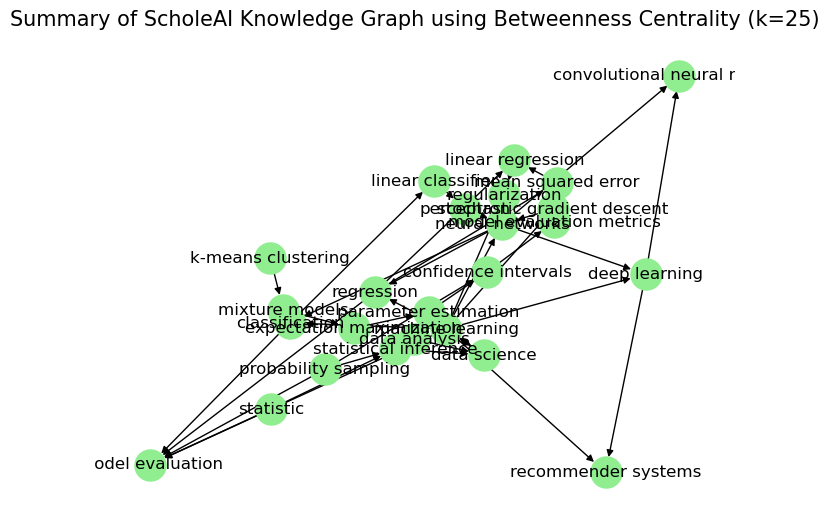

In [4]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_k_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:K]
subgraphBC = G.subgraph(top_k_nodes).copy()

# Print the nodes
for node in list(subgraphBC.nodes):
    print(node)
    
# Visualization
nx.draw(subgraphBC, with_labels=True, node_size=500,
        node_color="lightgreen", arrows=True)
plt.title(f'Summary of ScholeAI Knowledge Graph using Betweenness Centrality (k={K})', fontsize=15)
plt.show()

confidence intervals
bias-variance tradeoff
regression
stochastic gradient descent
data visualization
model evaluation and selection
randomized experiment
mean squared error
support vector
support vector machine
logistic regression
classification
parameter estimation
model evaluation
language modeling
predictive modeling
data science
statistical significance
linear regression
hypothesis testing
neural networks
model evaluation metrics
exploratory data analysis
data analysis
cross-validation


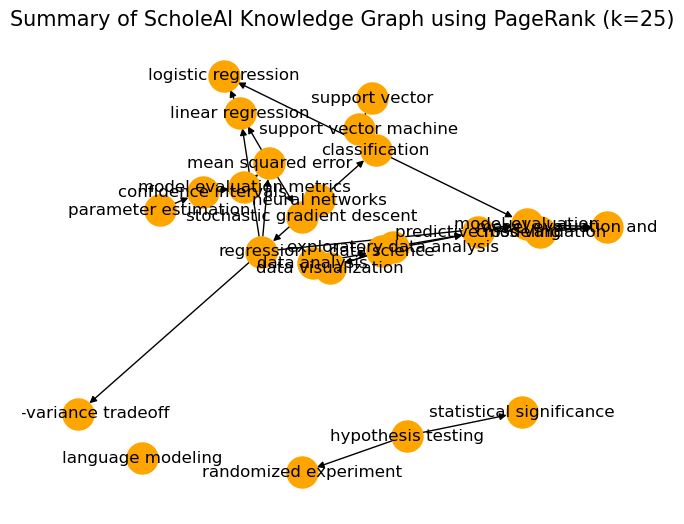

In [5]:
# PageRank
pagerank = nx.pagerank(G)
top_k_nodes = sorted(pagerank, key=pagerank.get, reverse=True)[:K]
subgraphPR = G.subgraph(top_k_nodes).copy()

# Print the nodes
for node in list(subgraphPR.nodes):
    print(node)

# Visualization
nx.draw(subgraphPR, with_labels=True, node_size=500,
        node_color="orange", arrows=True)
plt.title(f'Summary of ScholeAI Knowledge Graph using PageRank (k={K})', fontsize=15)
plt.show()

perceptron
linear classifier
regularization
mean squared error
linear regression
regression
stochastic gradient descent
least squares method
overfitting
backpropagation
classifier
neural networks
classification


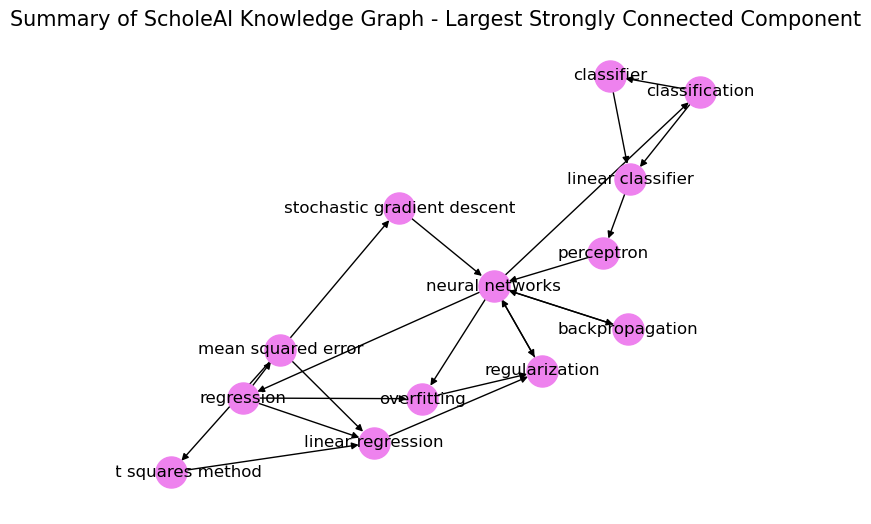

In [6]:
# Strongly connected components
sccs = list(nx.strongly_connected_components(G))
largest_scc = max(sccs, key=len)
subgraphSCC = G.subgraph(largest_scc).copy()

# Print the nodes
for node in list(subgraphSCC.nodes):
    print(node)

# Visualization
nx.draw(subgraphSCC, with_labels=True, node_size=500,
        node_color="violet", arrows=True)
plt.title('Summary of ScholeAI Knowledge Graph - Largest Strongly Connected Component', fontsize=15)
plt.show()

In [7]:
# Group edges by source node
grouped_edges = defaultdict(list)
for u, v in subgraphPR.edges():
    grouped_edges[u].append(v)

# Create string representation
edges_str = "\n".join([f"{u} -> {', '.join(map(str, v_list))}" for u, v_list in grouped_edges.items()])
print(edges_str)

# Save to file
with open(os.path.join(GRAPH_PATH, "graph.txt"), "w") as f:
    f.write(repr(edges_str))


confidence intervals -> model evaluation metrics
regression -> bias-variance tradeoff, model evaluation, mean squared error, linear regression
stochastic gradient descent -> neural networks
data visualization -> data analysis, exploratory data analysis
mean squared error -> stochastic gradient descent, linear regression
support vector machine -> support vector
classification -> logistic regression, model evaluation
parameter estimation -> confidence intervals
model evaluation -> cross-validation, model evaluation and selection
predictive modeling -> model evaluation, model evaluation and selection
data science -> predictive modeling, exploratory data analysis, data visualization
linear regression -> logistic regression
hypothesis testing -> randomized experiment, statistical significance
neural networks -> regression, classification
model evaluation metrics -> mean squared error
exploratory data analysis -> predictive modeling
data analysis -> data science, data visualization
cross-val